<a href="https://colab.research.google.com/github/kimheeseo/2022_Efficient-ML/blob/main/mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
import numpy as np
from matplotlib import pyplot
H=np.matrix(([1,0,1,1,1,0,0],[0,1,0,1,1,1,0],[0,0,1,0,1,1,1]))
print('matirx H값 \n',H)

matirx H값 
 [[1 0 1 1 1 0 0]
 [0 1 0 1 1 1 0]
 [0 0 1 0 1 1 1]]


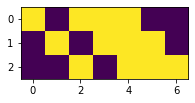

In [218]:
pyplot.figure(figsize=(3,7))
pyplot.imshow(H)
pyplot.show()

In [219]:
code_N=7
print('cdoe_N값',code_N)
print('H.shape(0)값',H.shape[0])

cdoe_N값 7
H.shape(0)값 3


In [220]:
# mask_size = code.n + code.pc_matrix.size(0)
mask_size=code_N+H.shape[0]
print('mask_size값',mask_size)

mask_size값 10


In [221]:
#mask = torch.eye(mask_size, mask_size)
mask=np.eye(mask_size,mask_size,dtype=int)

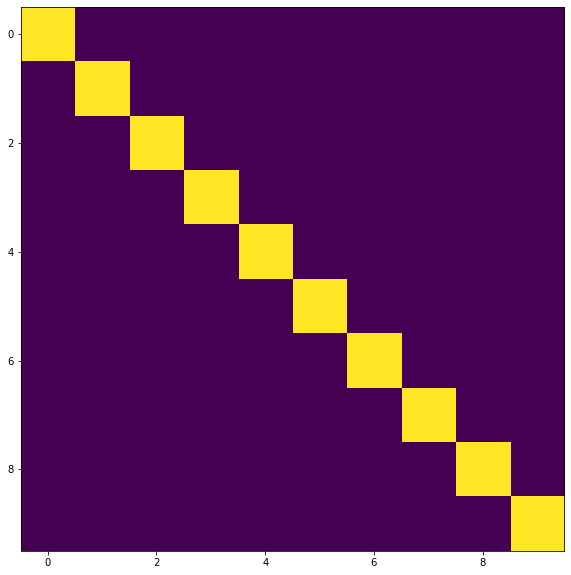

In [222]:
pyplot.figure(figsize=(10,10))
pyplot.imshow(mask)
pyplot.show()

In [223]:
import torch
print('H.shape[0]값',H.shape[0])

for ii in range(H.shape[0]):
  idx=np.where(H[ii]>0)[0]
  for jj in idx:
    for kk in idx:
      if (jj!= kk).all():
        mask[jj, kk] += 1
        mask[kk, jj] += 1
        mask[code_N + ii, jj] += 1
        mask[jj, code_N + ii] += 1

H.shape[0]값 3


In [224]:
mask

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

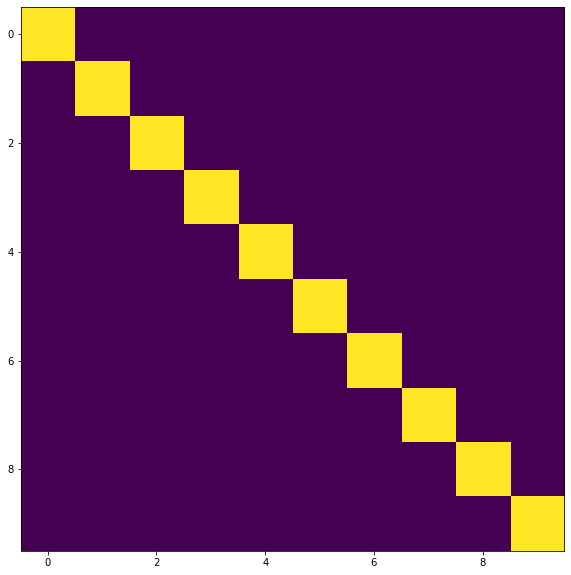

In [225]:
mask=mask%2
pyplot.figure(figsize=(10,10))
pyplot.imshow(mask)
pyplot.show()

# **pytorch**

In [226]:
import torch
code_n=7
code_pc_matrix=torch.tensor([[1,0,1,1,1,0,0],[0,1,0,1,1,1,0],[0,0,1,0,1,1,1]])
print(code_pc_matrix)

tensor([[1, 0, 1, 1, 1, 0, 0],
        [0, 1, 0, 1, 1, 1, 0],
        [0, 0, 1, 0, 1, 1, 1]])


In [227]:
mask_size = code_n + code_pc_matrix.shape[0]
print('mask_size값 :',mask_size)

mask_size값 : 10


In [228]:
code_pc_matrix.shape[0]

3

In [229]:
mask = torch.eye(mask_size, mask_size)
mask

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [230]:
ii=0
idx = torch.where(code_pc_matrix[ii] > 0)
print('idx값',idx)

idx값 (tensor([0, 2, 3, 4]),)


In [231]:
for ii in range(code_pc_matrix.shape[0]):
    idx = torch.where(code_pc_matrix[ii] > 0)[0]
    for jj in idx:
        for kk in idx:
            if jj != kk:
                mask[jj, kk] += 1
                mask[kk, jj] += 1
                mask[code_n + ii, jj] += 1
                mask[jj, code_n + ii] += 1

    src_mask = ~ (mask > 0).unsqueeze(0).unsqueeze(0)

In [232]:
src_mask

tensor([[[[False,  True, False, False, False,  True,  True, False,  True,  True],
          [ True, False,  True, False, False, False,  True,  True, False,  True],
          [False,  True, False, False, False, False, False, False,  True, False],
          [False, False, False, False, False, False,  True, False, False,  True],
          [False, False, False, False, False, False, False, False, False, False],
          [ True, False, False, False, False, False, False,  True, False, False],
          [ True,  True, False,  True, False, False, False,  True,  True, False],
          [False,  True, False, False, False,  True,  True, False,  True,  True],
          [ True, False,  True, False, False, False,  True,  True, False,  True],
          [ True,  True, False,  True, False, False, False,  True,  True, False]]]])

In [233]:
src_mask.shape

torch.Size([1, 1, 10, 10])

In [234]:
mask

tensor([[1., 0., 2., 2., 2., 0., 0., 3., 0., 0.],
        [0., 1., 0., 2., 2., 2., 0., 0., 3., 0.],
        [2., 0., 1., 2., 4., 2., 2., 3., 0., 3.],
        [2., 2., 2., 1., 4., 2., 0., 3., 3., 0.],
        [2., 2., 4., 4., 1., 4., 2., 3., 3., 3.],
        [0., 2., 2., 2., 4., 1., 2., 0., 3., 3.],
        [0., 0., 2., 0., 2., 2., 1., 0., 0., 3.],
        [3., 0., 3., 3., 3., 0., 0., 1., 0., 0.],
        [0., 3., 0., 3., 3., 3., 0., 0., 1., 0.],
        [0., 0., 3., 0., 3., 3., 3., 0., 0., 1.]])

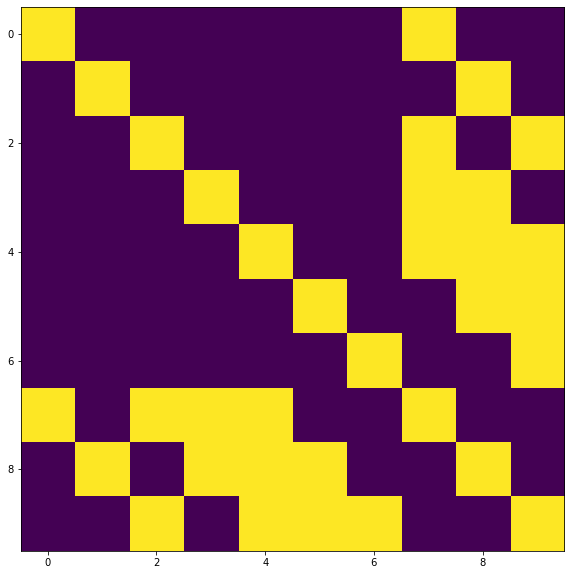

In [235]:
mask=mask%2
pyplot.figure(figsize=(10,10))
pyplot.imshow(mask)
pyplot.show()

In [236]:
src_mask = ~ (mask > 0).unsqueeze(0)
src_mask

tensor([[[False,  True,  True,  True,  True,  True,  True, False,  True,  True],
         [ True, False,  True,  True,  True,  True,  True,  True, False,  True],
         [ True,  True, False,  True,  True,  True,  True, False,  True, False],
         [ True,  True,  True, False,  True,  True,  True, False, False,  True],
         [ True,  True,  True,  True, False,  True,  True, False, False, False],
         [ True,  True,  True,  True,  True, False,  True,  True, False, False],
         [ True,  True,  True,  True,  True,  True, False,  True,  True, False],
         [False,  True, False, False, False,  True,  True, False,  True,  True],
         [ True, False,  True, False, False, False,  True,  True, False,  True],
         [ True,  True, False,  True, False, False, False,  True,  True, False]]])

In [237]:
src_mask.shape

torch.Size([1, 10, 10])

In [238]:
src_mask.shape
print(src_mask.long())

tensor([[[0, 1, 1, 1, 1, 1, 1, 0, 1, 1],
         [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
         [1, 1, 0, 1, 1, 1, 1, 0, 1, 0],
         [1, 1, 1, 0, 1, 1, 1, 0, 0, 1],
         [1, 1, 1, 1, 0, 1, 1, 0, 0, 0],
         [1, 1, 1, 1, 1, 0, 1, 1, 0, 0],
         [1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
         [0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
         [1, 0, 1, 0, 0, 0, 1, 1, 0, 1],
         [1, 1, 0, 1, 0, 0, 0, 1, 1, 0]]])


In [239]:
src_mask2=([0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
          [1, 0, 1, 0, 0, 0, 1, 1, 0, 1],
          [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
          [1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
          [0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
          [1, 0, 1, 0, 0, 0, 1, 1, 0, 1],
          [1, 1, 0, 1, 0, 0, 0, 1, 1, 0])

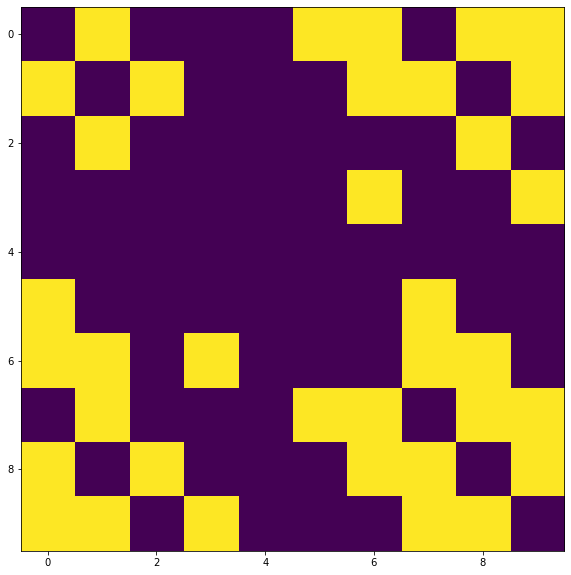

In [240]:
pyplot.figure(figsize=(10,10))
pyplot.imshow(src_mask2)
pyplot.show()